In [17]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io

In [2]:
%matplotlib inline

In [3]:

prediction = plt.imread('/Users/alzaia/Desktop/cnn_project/data_2_classes_gen/mask_3classes_final_2.png')


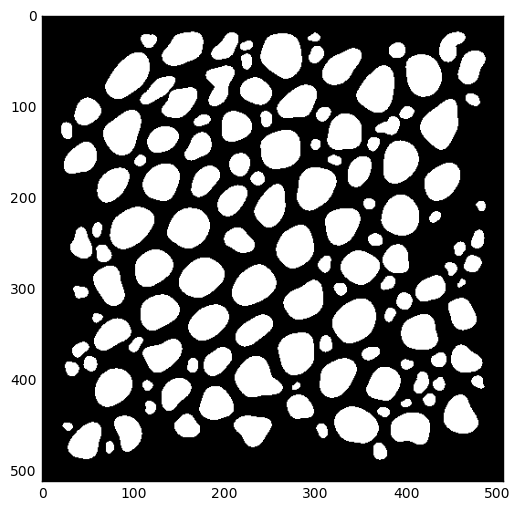

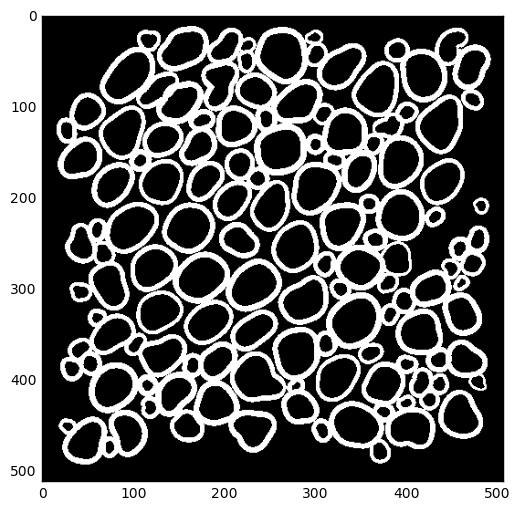

In [4]:

axon2 = plt.imread('/Users/alzaia/data/results_cropped_good_zone_deconv/Step_3_Final_AxonSeg.tif')
plt.figure(figsize=(10,6))
plt.imshow(axon2, cmap='gray')

myelin2 = plt.imread('/Users/alzaia/data/results_cropped_good_zone_deconv/Seg_mask_myelin.tif')
plt.figure(figsize=(10,6))
plt.imshow(myelin2, cmap='gray')


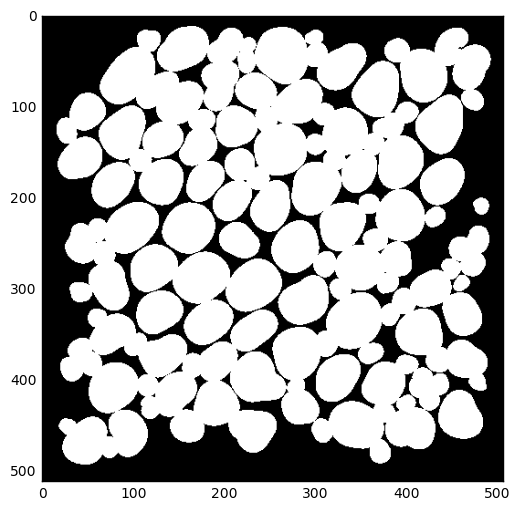

In [11]:
both = axon2+myelin2

bw = np.where(both > 0.4, 1, 0)

plt.figure(figsize=(10,6))
plt.imshow(bw, cmap='gray')

<type 'numpy.ndarray'>


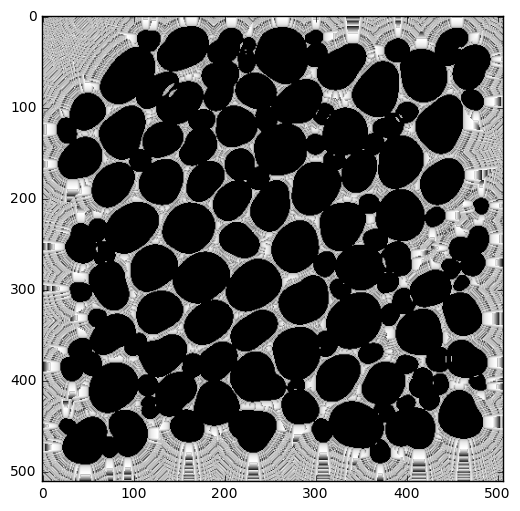

In [22]:
from scipy import ndimage
tmp = np.invert(both)
dist = ndimage.distance_transform_edt(tmp)
print(type(dist))

#io.imsave('test_dist_transform.png', dist)

#dist = np.invert(dist)

plt.figure(figsize=(10,6))
plt.imshow(dist, cmap='gray')

RuntimeError: sequence argument must have length equal to input rank

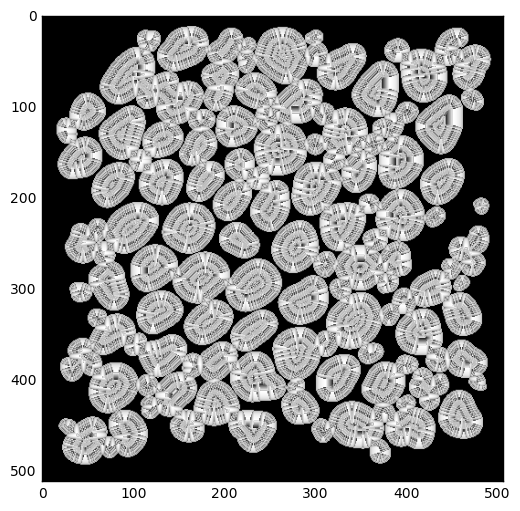

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


image=both

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
plt.figure(figsize=(10,6))
plt.imshow(distance, cmap='gray')

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)))

plt.figure(figsize=(10,6))
plt.imshow(local_maxi, cmap='gray')


markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

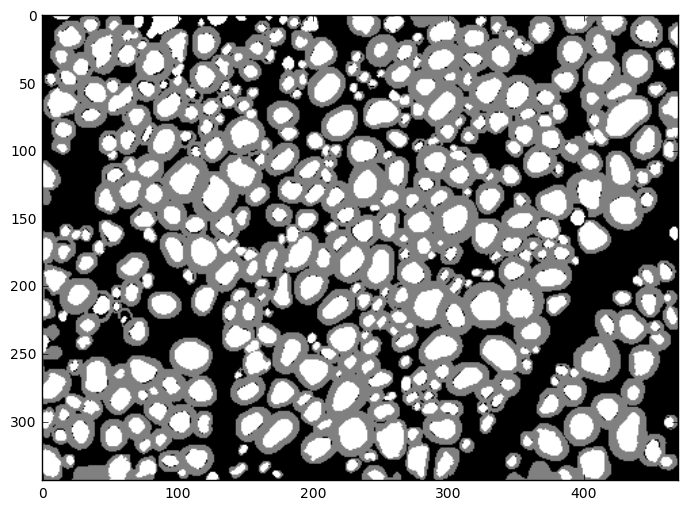

In [10]:
plt.figure(figsize=(10,6))
plt.imshow(prediction, cmap='gray')


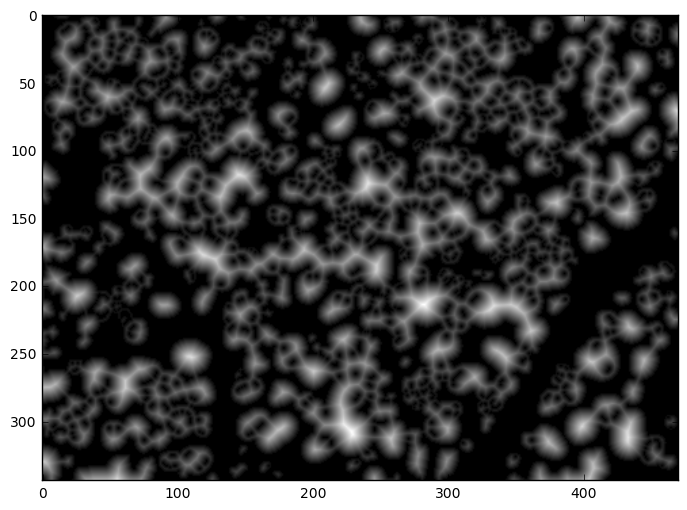

In [11]:
from scipy import ndimage
dist = ndimage.distance_transform_edt(prediction)

plt.figure(figsize=(10,6))
plt.imshow(dist, cmap='gray')




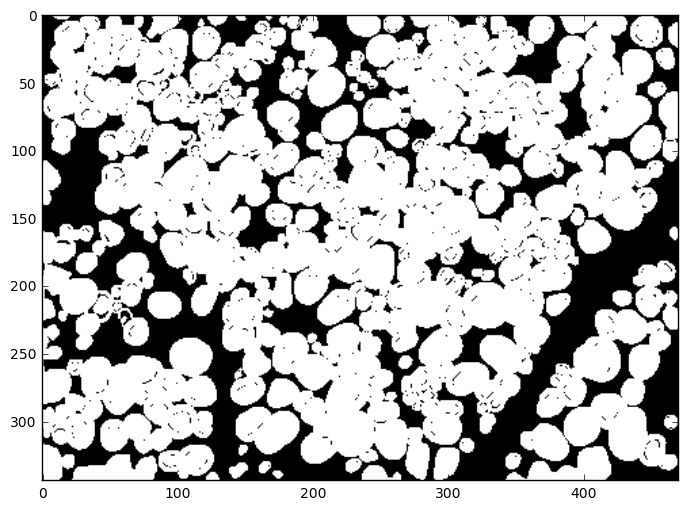

In [12]:
bw = np.where(prediction > 0.4, 1, 0)

plt.figure(figsize=(10,6))
plt.imshow(bw, cmap='gray')

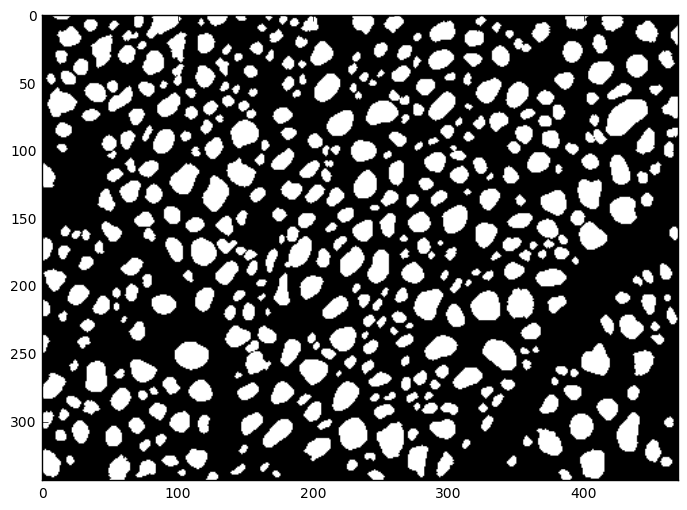

In [13]:
axons = np.where(prediction > 0.6, 1, 0)
plt.figure(figsize=(10,6))
plt.imshow(axons, cmap='gray')



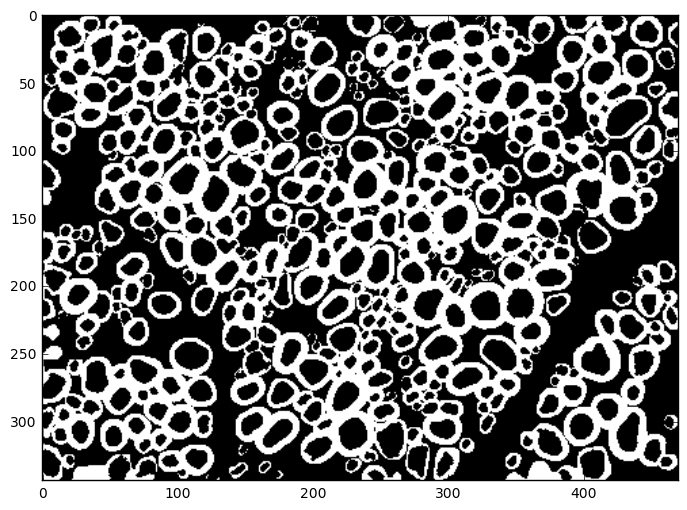

In [14]:
myelins = prediction-axons
plt.figure(figsize=(10,6))
plt.imshow(myelins, cmap='gray')

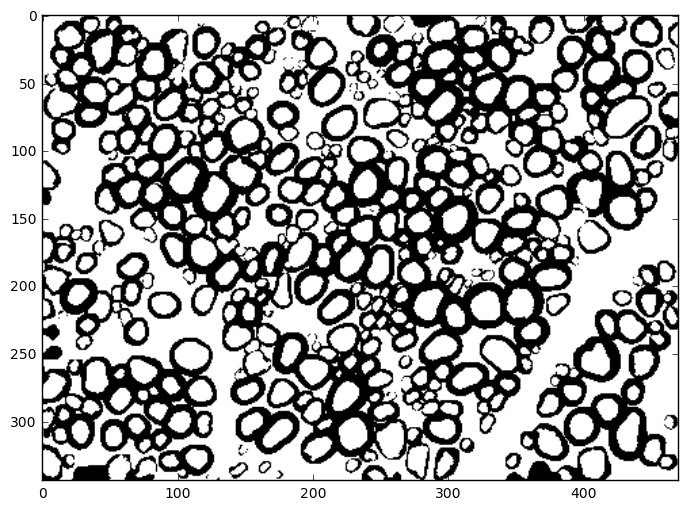

In [15]:
myelins_inv=1-myelins
plt.figure(figsize=(10,6))
plt.imshow(myelins_inv, cmap='gray')


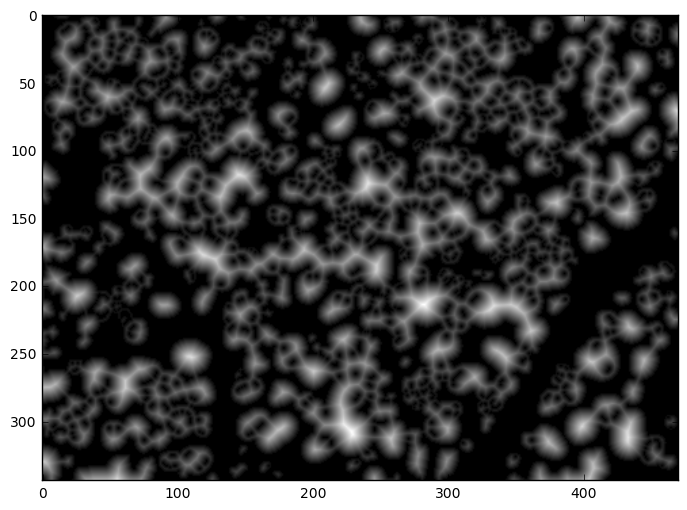

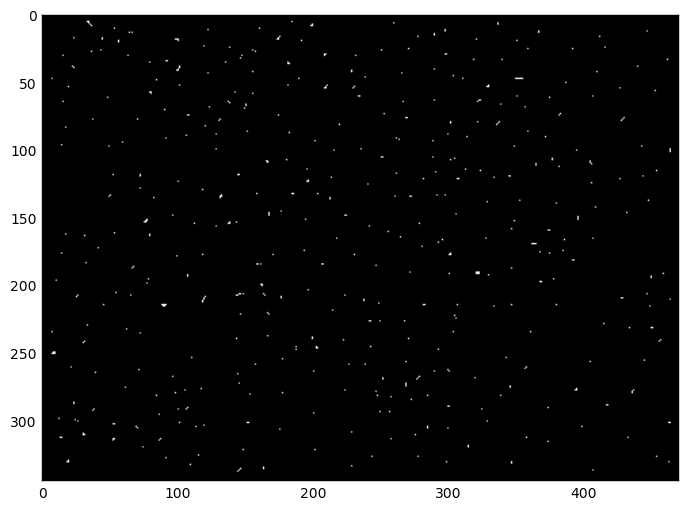

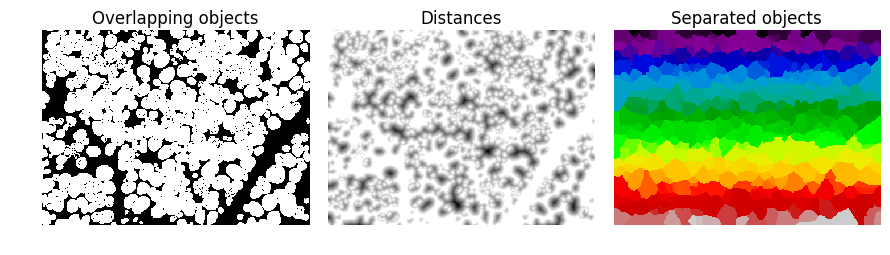

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


image=bw

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
plt.figure(figsize=(10,6))
plt.imshow(distance, cmap='gray')

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((11, 11)))

plt.figure(figsize=(10,6))
plt.imshow(local_maxi, cmap='gray')


markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

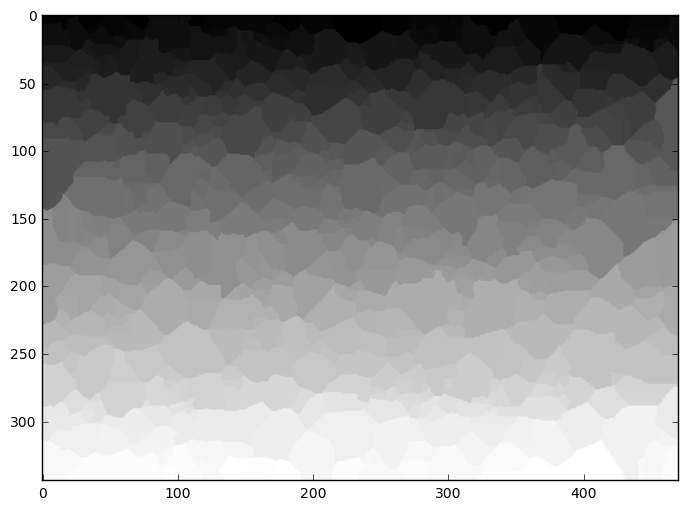

In [66]:
plt.figure(figsize=(10,6))
plt.imshow(labels, cmap='gray')